# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\55119\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Your code here.
tardies = [10,1,5,9,4,2,9,6,0,3]
ages = [17,51,27,21,36,48,19,26,54,30]
student_data = pd.DataFrame({'Age': ages, 'Tardies': tardies})

Draw a dispersion diagram (scatter plot) for the data.

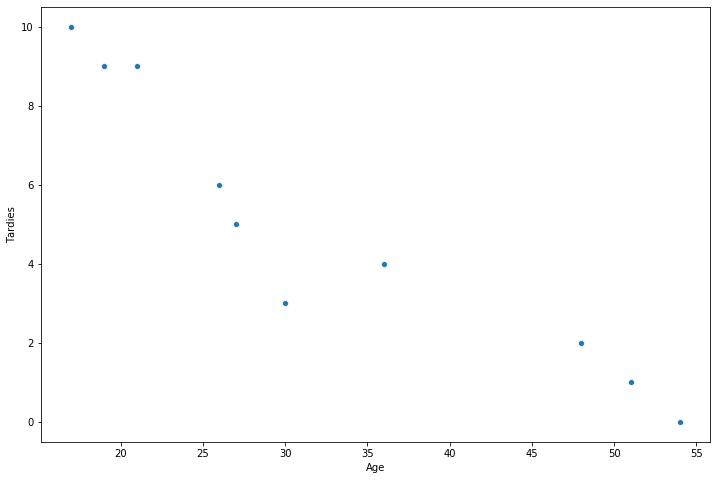

In [18]:
# Your code here.
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Age', y = 'Tardies', data = student_data)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# We can confirm the initial hypothesis that the younger the students are, more often they are late to class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [9]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
#Both measures show a negative relationship between the variables Age and Tardies. Correlation gives a richer
#information because is the covariance normalized. So besides the fact that they have a negative relation ship it
#tells us that they have a strong relationship.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.
X = student_data[['Age']]
y = student_data['Tardies']
model = LinearRegression()
model.fit(X,y)
predicted_y = model.predict(X)
# For this analysis we will use the linear regression, using the age as a predictive variable to find out who late
#the student is.

In [14]:
predicted_y

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

In [15]:
X

,Age
0,17
1,51
2,27
3,21
4,36
5,48
6,19
7,26
8,54
9,30


Plot your regression model on your scatter plot.

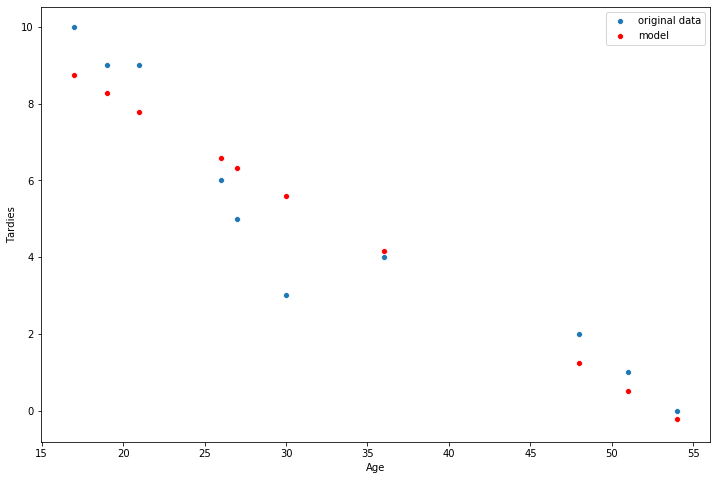

In [19]:
# Your code here.
plt.figure(figsize = (12,8))

sns.scatterplot(x = 'Age', y = 'Tardies', data = student_data, label = 'original data')
sns.scatterplot(x = student_data['Age'], y = predicted_y, color = 'red', label = 'model')
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# Yes, as we can see above the prediction of the model is pretty close from the original data.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
# Import any libraries you may need & the data
cars = pd.read_csv('../data/vehicles.csv')

In [25]:
cars.head()
cars = cars.loc[:,['Year',
                   'Cylinders',
                   'Fuel Barrels/Year',
                   'Combined MPG',
                   'Fuel Cost/Year',
                   'CO2 Emission Grams/Mile']]

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
# Your response here.
cars.corr().loc[:,['CO2 Emission Grams/Mile']].sort_values(by = 'CO2 Emission Grams/Mile', ascending = False)

,CO2 Emission Grams/Mile
CO2 Emission Grams/Mile,1.000000
Fuel Barrels/Year,0.986189
Fuel Cost/Year,0.930865
Engine Displacement,0.803520
Cylinders,0.752393
Year,-0.222300
City MPG,-0.894139
Combined MPG,-0.926229
Highway MPG,-0.926405


In [ ]:
# 'Fuel Barrels/Year' and 'Fuel Cost/Year' are variables with a strong positive relationship with the target
#variable in the other hand the variables 'Combined MPG' and 'Highway MPG' have strong negative relation with 
# 'CO2 Emission Grams/Mile'. We expect for those 4 features to be important in the linear regression model.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.
X = cars[[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = cars['CO2 Emission Grams/Mile']
model.fit(X,y)
predicted_y = model.predict(X)
#For this analysis we will continue to work with linear regression, but now with multiple explaining features.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [50]:
# Your code here.
X=[1,3,4,6,8,9,11,14]
Y=[1,2,4,4,5,7,8,13]
df = pd.DataFrame(list(zip(X,Y)), columns = ['X','Y'])

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

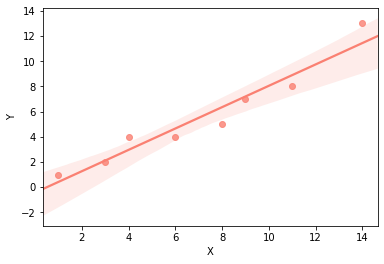

In [47]:
# Your code here.
sns.regplot(x = 'X', y = 'Y', data = df, color = 'salmon');

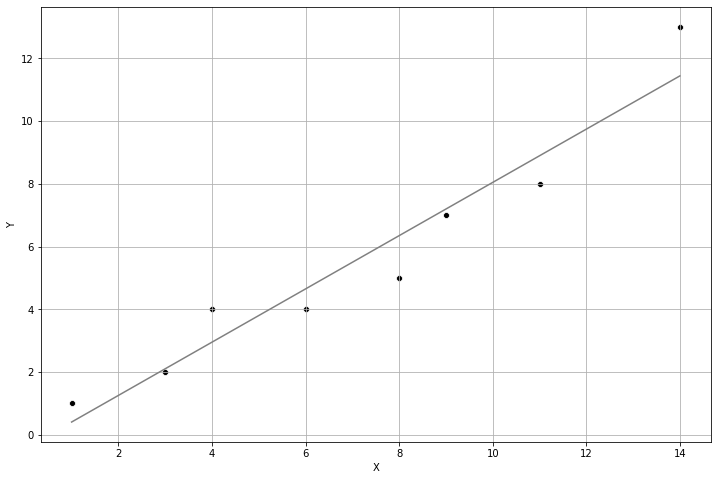

In [52]:
model.fit(df[['X']], df['Y'])
y_pred = model.predict(df[['X']])
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'X', y = 'Y', data = df, color = 'k')
sns.lineplot(x = df['X'], y = y_pred, color = 'grey')
plt.grid()
plt.show()

In [53]:
model.coef_

array([0.84848485])

In [54]:
model.intercept_

-0.43939393939393945

In [55]:
model.score(df[['X']], df['Y'])

0.9316696375519905

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here.
# We can infer from the plot that they have a strong positive relation.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [57]:
# Your response here.
new_df = df.drop(index = 7)

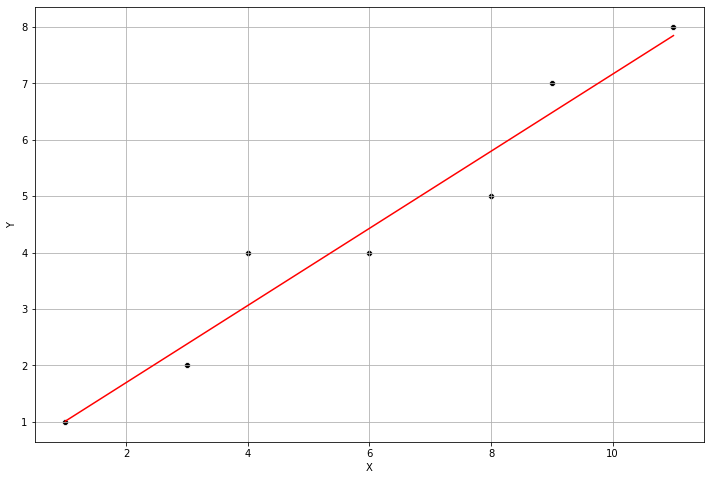

In [60]:
X = new_df[['X']]
y = new_df['Y']
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'X', y = 'Y', data = new_df, color = 'k')
sns.lineplot(x = new_df['X'], y = y_pred, color = 'red')
plt.grid()
plt.show()

In [61]:
model.intercept_

0.32330827067669077

In [62]:
model.coef_

array([0.68421053])

In [63]:
model.score(X,y)

0.9433811802232853

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# Removing the point made the slope of the line positive and the coefficient smaller. Overall we could say that
# there were no improvement, the score is also almos the same.